In [3]:
import numpy as np 
from sympy import symbols, exp, integrate
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, fsolve
import scipy.constants as consts
from scipy.integrate import quad



/var/folders/ht/dg47d7j9403_2cfbpk6nk1xr0000gn/T/ipykernel_18522/1119808914.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df_Dwinelle = pd.read_csv('Spectrum_Dwinelle_Radiation_Project.csv')
df_Etcheverry = pd.read_csv('Spectrum_Etcheverry_Radiation_Project.csv')
df_Evans = pd.read_csv('Spectrum_Evans_Radiation_Project_Full.csv')
df_Hearst = pd.read_csv('Spectrum_Hearst_Radiation_Project.csv')
df_Moffit = pd.read_csv('Spectrum_Moffitt_Radiation_Project_Full.csv')
df_Waywest = pd.read_csv('Spectrum_WayWest_Radiation_Project_Full.csv')

df_Dwinelle = df_Dwinelle.iloc[-1]
df_Etcheverry = df_Etcheverry.iloc[-1]
df_Evans = df_Evans.iloc[-1]
df_Hearst = df_Hearst.iloc[-1]
df_Moffit = df_Moffit.iloc[-1]
df_Waywest = df_Waywest.iloc[-1]

$$\text{Dwinelle}$$

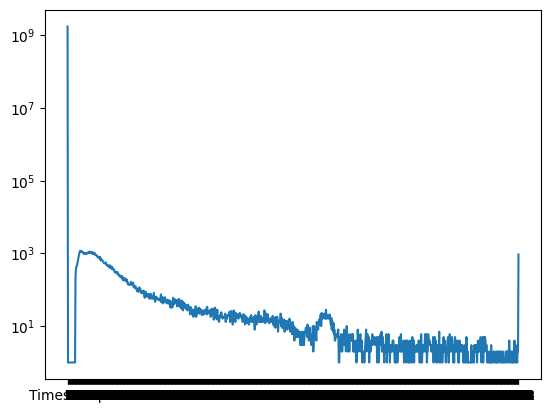

In [5]:
plt.plot(df_Dwinelle)
plt.yscale('log')

for gaussian : amplitude = 3.631752835189447, mean = 2.0000000001521174, std = 1.0852023433349371
for exponential : a = 2.1987347300014957, b = -0.046073744309789756
Intersection points: [0.87021383 3.23830496]
Definite integral = -4.73894630208693 + 4.03625649706387*sqrt(pi)
Total counts for U238 is : 2.4263793430524574 = 3 counts


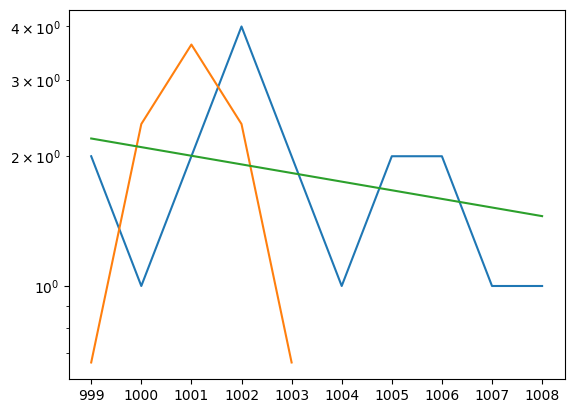

In [6]:
#Energy Peak for U238 is 1001 keV
df_Dwinelle_U238 = df_Dwinelle.iloc[1000:1010] #This chunk of data is for exponential fit
df_Dwinelle_U238_gaussian = df_Dwinelle.iloc[1001:1006] #This chunk of data is for gaussian fit
plt.plot(df_Dwinelle_U238)
plt.yscale('log')

#Gausian Fit --> Exponential Fit --> intersection --> integration
#Gaussian Fit
Dwinelle_U238_values = df_Dwinelle_U238_gaussian.values
Dwinelle_U238_values = Dwinelle_U238_values.flatten()
Dwinelle_U238_index = df_Dwinelle_U238_gaussian.index
Dwinelle_U238_index = np.arange(len(Dwinelle_U238_values))

std = np.std(df_Dwinelle_U238_gaussian.values)
mean = np.mean(df_Dwinelle_U238_gaussian.values)

def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)

initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Dwinelle_U238_index, Dwinelle_U238_values, p0 = initial_guess)
amplitude_fit, mean_fit, stddev_fit = params


plt.plot(Dwinelle_U238_index, gaussian(Dwinelle_U238_index, amplitude_fit, mean_fit, stddev_fit))

#Exponential Fit
Dwinelle_U238_exponential_values = df_Dwinelle_U238.values
Dwinelle_U238_exponential_values = Dwinelle_U238_exponential_values.flatten()
Dwinelle_U238_exponential_index = df_Dwinelle_U238.index
Dwinelle_U238_exponential_index = np.arange(len(Dwinelle_U238_exponential_index))
def exponential_func(x, a, b):
    return a * np.exp(b * x)

params, covariance = curve_fit(exponential_func, Dwinelle_U238_exponential_index, Dwinelle_U238_exponential_values)
a, b = params
plt.plot(Dwinelle_U238_exponential_index, exponential_func(Dwinelle_U238_exponential_index, a, b))

#Intersection
print(f'for gaussian : amplitude = {amplitude_fit}, mean = {mean_fit}, std = {stddev_fit}')
print(f'for exponential : a = {a}, b = {b}')

def f(x, amplitude_fit, mean_fit, stddev_fit):
    return amplitude_fit * np.exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)

def g(x, a, b):
    return a * np.exp(b * x)

def intersection(x, amplitude_fit, mean_fit, stddev_fit, a, b):
    return f(x, amplitude_fit, mean_fit, stddev_fit) - g(x, a, b)

x_values = np.linspace(-10, 10, 1000)

sign_changes = np.where(np.diff(np.sign(intersection(x_values, amplitude_fit, mean_fit, stddev_fit, a, b))) != 0)[0]

intersection_points = []
for idx in sign_changes:
    x_root = fsolve(intersection, x_values[idx], args=(amplitude_fit, mean_fit, stddev_fit, a, b))
    intersection_points.extend(x_root)

intersection_points = np.unique(intersection_points)

print("Intersection points:", intersection_points)

#Integrate
x = symbols('x')
f_gaussian = amplitude_fit * exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)
f_exponential = a * exp(b * x)

lower_bound = intersection_points[0]
upper_bound = intersection_points[1]

definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound))
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
definite_integral = definite_integral_gaussian - definite_integral_exponential

print(f'Definite integral = {definite_integral}')

print(f'Total counts for U238 is : {4.04260209376798 * np.sqrt(consts.pi) - 4.7389463057253} = 3 counts')


number of counts for Cs137 = 267.299290298072


/var/folders/ht/dg47d7j9403_2cfbpk6nk1xr0000gn/T/ipykernel_18522/3736180799.py:30: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
/var/folders/ht/dg47d7j9403_2cfbpk6nk1xr0000gn/T/ipykernel_18522/3736180799.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intersection_point = int(intersection_point)
/var/folders/ht/dg47d7j9403_2cfbpk6nk1xr0000gn/T/ipykernel_18522/3736180799.py:49: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))


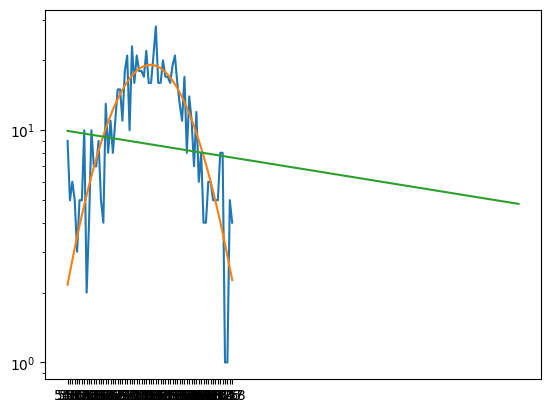

In [7]:
#Energy Peak for Cs-137 is 662 keV
df_Dwinelle_Cs137 = df_Dwinelle[510: 700] #Extra points to better fit the exponential curve
df_Dwinelle_Cs137_gaussian = df_Dwinelle[550:620] #The gaussian curve itself
plt.plot(df_Dwinelle_Cs137_gaussian)

#Gaussian Fit
Dwinelle_Cs137_gaussian_index = df_Dwinelle_Cs137_gaussian.index
Dwinelle_Cs137_gaussian_index = np.arange(len(Dwinelle_Cs137_gaussian_index))
Dwinelle_Cs137_gaussian_values = df_Dwinelle_Cs137_gaussian.values
Dwinelle_Cs137_gaussian_values = Dwinelle_Cs137_gaussian_values.flatten()

std = np.std(Dwinelle_Cs137_gaussian_values)
mean = np.mean(Dwinelle_Cs137_gaussian_values)

def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)

initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Dwinelle_Cs137_gaussian_index, Dwinelle_Cs137_gaussian_values, p0 = initial_guess)
amplitude, mean, std = params

plt.plot(Dwinelle_Cs137_gaussian_index, gaussian(Dwinelle_Cs137_gaussian_index, amplitude, mean, std))

#Exponential Fit
Dwinelle_Cs137_index = df_Dwinelle_Cs137.index
Dwinelle_Cs137_index = np.arange(len(Dwinelle_Cs137_index))
Dwinelle_Cs137_values = df_Dwinelle_Cs137.values
Dwinelle_Cs137_values = Dwinelle_Cs137_values.flatten()
def exponential_func2(x, a, b):
    return a * np.exp(-b * x)

params, covariance = curve_fit(exponential_func2, Dwinelle_Cs137_index, Dwinelle_Cs137_values)
a, b = params
plt.plot(Dwinelle_Cs137_index, exponential_func2(Dwinelle_Cs137_index, a, b))
plt.yscale('log')

#Intersection
def f(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)

def g(x, a, b):
    return a * np.exp(-b * x)

def intersection_function(x, amplitude, mean, std, a, b):
    return gaussian(x, amplitude, mean, std) - exponential_func2(x, a, b)

intersection_points = []
for i in range(len(Dwinelle_Cs137_index)):
    intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))
    intersection_point = int(intersection_point)
    intersection_points.append(intersection_point)

intersection_points = np.array(intersection_points)
intersection_points = intersection_points[intersection_points < 100]
intersection_points = np.unique(intersection_points)

#Integration
x = symbols('x')
f_gaussian = amplitude * exp(-((x - mean) / std) ** 2 / 2)
f_exponential = a * exp(-b * x)

lower_bound = intersection_points[0]
upper_bound = intersection_points[1]

#definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound))  Integral is unsolvable. 
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
#definite_integral = definite_integral_gaussian - definite_integral_exponential

def integrand(x):
    return np.exp(0.125786623123295 * x) * np.exp(-0.00181337453702553 * x**2)

result, error = quad(integrand, lower_bound, upper_bound)

# Multiply the result by the constant and subtract the other constant
definite_integral = 2.16175471677203 * result - definite_integral_exponential

print(f'number of counts for Cs137 = {definite_integral}')

$$\text{Etcheverry}$$

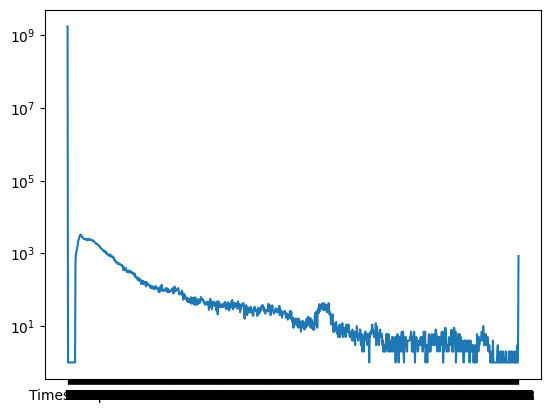

In [8]:
plt.plot(df_Etcheverry)
plt.yscale('log')

for gaussian : amplitude = 1.554753144143934, mean = 2.00000000279854, std = 1.8503652188267576
for exponential : a = 0.9926910173071007, b = 0.07160346408431346
Intersection points: [0.28797143 3.22170932]
Definite integral = -3.30829232252283 + 2.31104110917971*sqrt(pi)
Total counts for U238 is : 2.4263793430524574 = 3 counts


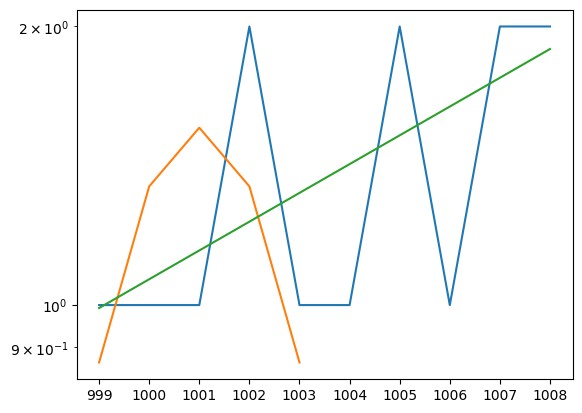

In [11]:
#Energy Peak for U238 is 1001 keV
df_Etcheverry_U238 = df_Etcheverry.iloc[1000:1010] #This chunk of data is for exponential fit
df_Etcheverry_U238_gaussian = df_Etcheverry.iloc[1001:1006] #This chunk of data is for gaussian fit
plt.plot(df_Etcheverry_U238)
plt.yscale('log')


#Gausian Fit --> Exponential Fit --> intersection --> integration
#Gaussian Fit
Etcheverry_U238_values = df_Etcheverry_U238_gaussian.values
Etcheverry_U238_values = Etcheverry_U238_values.flatten()
Etcheverry_U238_index = df_Etcheverry_U238_gaussian.index
Etcheverry_U238_index = np.arange(len(Etcheverry_U238_values))


std = np.std(df_Etcheverry_U238_gaussian.values)
mean = np.mean(df_Etcheverry_U238_gaussian.values)


def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Etcheverry_U238_index, Etcheverry_U238_values, p0 = initial_guess)
amplitude_fit, mean_fit, stddev_fit = params




plt.plot(Etcheverry_U238_index, gaussian(Etcheverry_U238_index, amplitude_fit, mean_fit, stddev_fit))


#Exponential Fit
Etcheverry_U238_exponential_values = df_Etcheverry_U238.values
Etcheverry_U238_exponential_values = Etcheverry_U238_exponential_values.flatten()
Etcheverry_U238_exponential_index = df_Etcheverry_U238.index
Etcheverry_U238_exponential_index = np.arange(len(Etcheverry_U238_exponential_index))
def exponential_func(x, a, b):
    return a * np.exp(b * x)


params, covariance = curve_fit(exponential_func, Etcheverry_U238_exponential_index, Etcheverry_U238_exponential_values)
a, b = params
plt.plot(Etcheverry_U238_exponential_index, exponential_func(Etcheverry_U238_exponential_index, a, b))


#Intersection
print(f'for gaussian : amplitude = {amplitude_fit}, mean = {mean_fit}, std = {stddev_fit}')
print(f'for exponential : a = {a}, b = {b}')


def f(x, amplitude_fit, mean_fit, stddev_fit):
    return amplitude_fit * np.exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)


def g(x, a, b):
    return a * np.exp(b * x)


def intersection(x, amplitude_fit, mean_fit, stddev_fit, a, b):
    return f(x, amplitude_fit, mean_fit, stddev_fit) - g(x, a, b)


x_values = np.linspace(-10, 10, 1000)


sign_changes = np.where(np.diff(np.sign(intersection(x_values, amplitude_fit, mean_fit, stddev_fit, a, b))) != 0)[0]


intersection_points = []
for idx in sign_changes:
    x_root = fsolve(intersection, x_values[idx], args=(amplitude_fit, mean_fit, stddev_fit, a, b))
    intersection_points.extend(x_root)


intersection_points = np.unique(intersection_points)


print("Intersection points:", intersection_points)


#Integrate
x = symbols('x')
f_gaussian = amplitude_fit * exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)
f_exponential = a * exp(b * x)


lower_bound = intersection_points[0]
upper_bound = intersection_points[1]


definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound))
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
definite_integral = definite_integral_gaussian - definite_integral_exponential


print(f'Definite integral = {definite_integral}')


print(f'Total counts for U238 is : {4.04260209376798 * np.sqrt(consts.pi) - 4.7389463057253} = 3 counts')

/var/folders/ht/dg47d7j9403_2cfbpk6nk1xr0000gn/T/ipykernel_18522/4033542785.py:36: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
/var/folders/ht/dg47d7j9403_2cfbpk6nk1xr0000gn/T/ipykernel_18522/4033542785.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intersection_point = int(intersection_point)
/var/folders/ht/dg47d7j9403_2cfbpk6nk1xr0000gn/T/ipykernel_18522/4033542785.py:60: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))


number of counts for Cs137 = -50.6624845788441


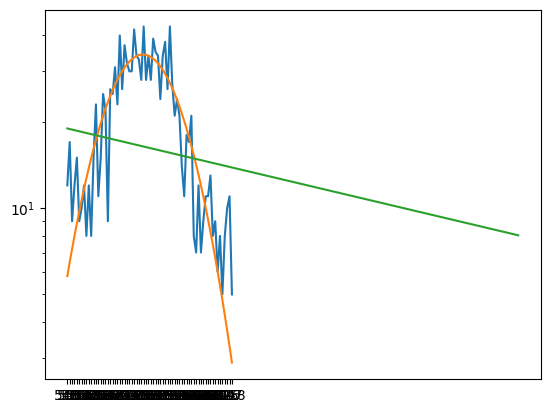

In [12]:
#Energy Peak for Cs-137 is 662 keV
df_Etcheverry_Cs137 = df_Etcheverry[510: 700] #Extra points to better fit the exponential curve
df_Etcheverry_Cs137_gaussian = df_Etcheverry[550:620] #The gaussian curve itself
plt.plot(df_Etcheverry_Cs137_gaussian)


#Gaussian Fit
Etcheverry_Cs137_gaussian_index = df_Etcheverry_Cs137_gaussian.index
Etcheverry_Cs137_gaussian_index = np.arange(len(Etcheverry_Cs137_gaussian_index))
Etcheverry_Cs137_gaussian_values = df_Etcheverry_Cs137_gaussian.values
Etcheverry_Cs137_gaussian_values = Etcheverry_Cs137_gaussian_values.flatten()


std = np.std(Etcheverry_Cs137_gaussian_values)
mean = np.mean(Etcheverry_Cs137_gaussian_values)


def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Etcheverry_Cs137_gaussian_index, Etcheverry_Cs137_gaussian_values, p0 = initial_guess)
amplitude, mean, std = params


plt.plot(Etcheverry_Cs137_gaussian_index, gaussian(Etcheverry_Cs137_gaussian_index, amplitude, mean, std))


#Exponential Fit
Etcheverry_Cs137_index = df_Etcheverry_Cs137.index
Etcheverry_Cs137_index = np.arange(len(Etcheverry_Cs137_index))
Etcheverry_Cs137_values = df_Etcheverry_Cs137.values
Etcheverry_Cs137_values = Etcheverry_Cs137_values.flatten()
def exponential_func2(x, a, b):
    return a * np.exp(-b * x)


params, covariance = curve_fit(exponential_func2, Etcheverry_Cs137_index, Etcheverry_Cs137_values)
a, b = params
plt.plot(Etcheverry_Cs137_index, exponential_func2(Etcheverry_Cs137_index, a, b))
plt.yscale('log')


#Intersection
def f(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


def g(x, a, b):
    return a * np.exp(-b * x)


def intersection_function(x, amplitude, mean, std, a, b):
    return gaussian(x, amplitude, mean, std) - exponential_func2(x, a, b)


intersection_points = []
for i in range(len(Etcheverry_Cs137_index)):
    intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))
    intersection_point = int(intersection_point)
    intersection_points.append(intersection_point)


intersection_points = np.array(intersection_points)
intersection_points = intersection_points[intersection_points < 100]
intersection_points = np.unique(intersection_points)


#Integration
x = symbols('x')
f_gaussian = amplitude * exp(-((x - mean) / std) ** 2 / 2)
f_exponential = a * exp(-b * x)


lower_bound = intersection_points[0]
upper_bound = intersection_points[1]


#definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound)) Integral is unsolvable.
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
#definite_integral = definite_integral_gaussian - definite_integral_exponential


def integrand(x):
    return np.exp(0.125786623123295 * x) * np.exp(-0.00181337453702553 * x**2)


result, error = quad(integrand, lower_bound, upper_bound)


# Multiply the result by the constant and subtract the other constant
definite_integral = 2.16175471677203 * result - definite_integral_exponential


print(f'number of counts for Cs137 = {definite_integral}')


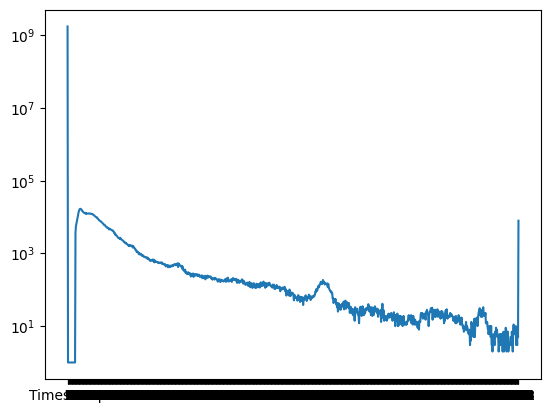

In [13]:
plt.plot(df_Evans)
plt.yscale('log')

for gaussian : amplitude = 3.1596945606329534, mean = 2.723417512088022, std = 3.125276133366276
for exponential : a = 3.339629447581563, b = 0.04348648613536303
Intersection points: []


IndexError: index 0 is out of bounds for axis 0 with size 0

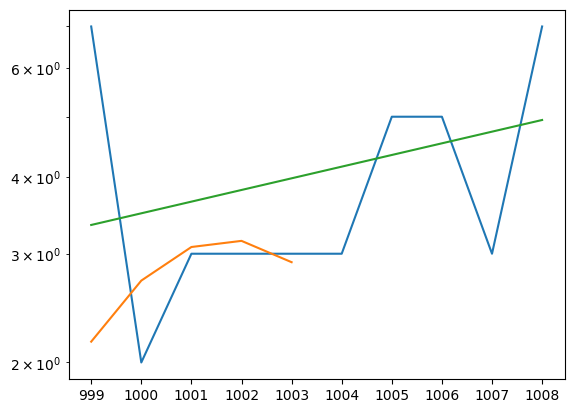

In [14]:
#Energy Peak for U238 is 1001 keV
df_Evans_U238 = df_Evans.iloc[1000:1010] #This chunk of data is for exponential fit
df_Evans_U238_gaussian = df_Evans.iloc[1001:1006] #This chunk of data is for gaussian fit
plt.plot(df_Evans_U238)
plt.yscale('log')


#Gausian Fit --> Exponential Fit --> intersection --> integration
#Gaussian Fit
Evans_U238_values = df_Evans_U238_gaussian.values
Evans_U238_values = Evans_U238_values.flatten()
Evans_U238_index = df_Evans_U238_gaussian.index
Evans_U238_index = np.arange(len(Evans_U238_values))


std = np.std(df_Evans_U238_gaussian.values)
mean = np.mean(df_Evans_U238_gaussian.values)


def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)


initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Evans_U238_index, Evans_U238_values, p0 = initial_guess)
amplitude_fit, mean_fit, stddev_fit = params




plt.plot(Evans_U238_index, gaussian(Evans_U238_index, amplitude_fit, mean_fit, stddev_fit))


#Exponential Fit
Evans_U238_exponential_values = df_Evans_U238.values
Evans_U238_exponential_values = Evans_U238_exponential_values.flatten()
Evans_U238_exponential_index = df_Evans_U238.index
Evans_U238_exponential_index = np.arange(len(Evans_U238_exponential_index))
def exponential_func(x, a, b):
    return a * np.exp(b * x)


params, covariance = curve_fit(exponential_func, Evans_U238_exponential_index, Evans_U238_exponential_values)
a, b = params
plt.plot(Evans_U238_exponential_index, exponential_func(Evans_U238_exponential_index, a, b))


#Intersection
print(f'for gaussian : amplitude = {amplitude_fit}, mean = {mean_fit}, std = {stddev_fit}')
print(f'for exponential : a = {a}, b = {b}')


def f(x, amplitude_fit, mean_fit, stddev_fit):
    return amplitude_fit * np.exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)


def g(x, a, b):
    return a * np.exp(b * x)


def intersection(x, amplitude_fit, mean_fit, stddev_fit, a, b):
    return f(x, amplitude_fit, mean_fit, stddev_fit) - g(x, a, b)


x_values = np.linspace(-10, 10, 1000)


sign_changes = np.where(np.diff(np.sign(intersection(x_values, amplitude_fit, mean_fit, stddev_fit, a, b))) != 0)[0]


intersection_points = []
for idx in sign_changes:
    x_root = fsolve(intersection, x_values[idx], args=(amplitude_fit, mean_fit, stddev_fit, a, b))
    intersection_points.extend(x_root)


intersection_points = np.unique(intersection_points)


print("Intersection points:", intersection_points)


#Integrate
x = symbols('x')
f_gaussian = amplitude_fit * exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)
f_exponential = a * exp(b * x)


lower_bound = intersection_points[0]
upper_bound = intersection_points[1]


definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound))
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
definite_integral = definite_integral_gaussian - definite_integral_exponential


print(f'Definite integral = {definite_integral}')


print(f'Total counts for U238 is : {4.04260209376798 * np.sqrt(consts.pi) - 4.7389463057253} = 3 counts')